# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download Data

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
Datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Transform Data

In [3]:
Datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,174073,174214,174214,174331,174582,175000,175353,175525,175893,175974
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,271825,271825,272030,272030,272210,272250,272337,272412,272479,272552
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265079,265130,265186,265227,265265,265297,265323,265346,265366,265391
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,38249,38342,38434,38434,38434,38620,38710,38794,38794,38794
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98746,98746,98796,98796,98806,98806,98829,98855,98855,98855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,648039,649110,649971,649971,649971,651700,652298,652763,652966,653293
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,524,526,530,530,532,532,533,533,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11771,11772,11774,11775,11777,11781,11781,11781,11783,11783
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,313203,313394,313613,313744,313821,313910,314159,314641,314850,314986


In [4]:
countries_JH=Datagrep['Country/Region'].unique().tolist()
dates_JH=list(Datagrep)[4:]
print(countries_JH[0:4])
print(len(countries_JH))
print(dates_JH[-2:])
print(len(dates_JH))

['Afghanistan', 'Albania', 'Algeria', 'Andorra']
198
['3/10/22', '3/11/22']
780


In [5]:
N=[]
for c in countries_JH:
    L=Datagrep[Datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [6]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,175000,272250,265297,38620,98806,11,7455,8942888,421401,3429179,...,855883,236967,42,516817,4582058,651700,532,11781,313910,239710
776,175353,272337,265323,38710,98829,11,7455,8949362,421541,3459870,...,857635,236994,52,516966,4776873,652298,533,11781,314159,240343
777,175525,272412,265346,38794,98855,11,7461,8955458,421592,3496205,...,859165,237045,95,517164,5042036,652763,533,11781,314641,240343
778,175893,272479,265366,38794,98855,11,7461,8961595,421714,3527894,...,860663,237059,102,517720,5260495,652966,535,11783,314850,241548


In [7]:
Datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    Datah_nc.append(L1)  
Data_nc=pd.DataFrame(np.array(Datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=Data_nc.copy()

In [8]:
Df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,418,40,32,186,0,0,0,6286,60,44962,...,1508,68,24,0,147358,1729,0,4,89,501
775,353,87,26,90,23,0,0,6474,140,30691,...,1752,27,10,149,194815,598,1,0,249,633
776,172,75,23,84,26,0,6,6096,51,36335,...,1530,51,43,198,265163,465,0,0,482,0
777,368,67,20,0,0,0,0,6137,122,31689,...,1498,14,7,556,218459,203,2,2,209,1205


In [9]:
Df['US']

0          1
1          1
2          0
3          3
4          0
       ...  
774    63110
775    29619
776    37595
777    48318
778    52110
Name: US, Length: 779, dtype: int32

In [10]:
Data_df['US']

0             1
1             1
2             2
3             2
4             5
         ...   
775    79339388
776    79369007
777    79406602
778    79454920
779    79507030
Name: US, Length: 780, dtype: int32

# Visualize Data

Text(0.5, 1.0, 'US COVID-19 Cases')

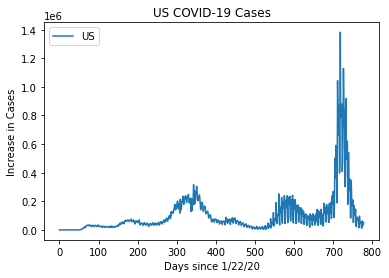

In [11]:
#Data_df['US'].plot()
#Data_df.plot()
#Data_df.plot(y=['US','China'])
Df.plot(y=['US'])
plt.xlabel('Days since 1/22/20')
plt.ylabel('Increase in Cases')
plt.title('US COVID-19 Cases')

# PCA

In [12]:
X=Df.values
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [13]:
X_std

array([[-0.58499357, -0.75337591, -0.94800695, ..., -0.58105543,
        -0.5273983 , -0.38222747],
       [-0.58499357, -0.75337591, -0.94800695, ..., -0.58105543,
        -0.5273983 , -0.38222747],
       [-0.58499357, -0.75337591, -0.94800695, ..., -0.58105543,
        -0.5273983 , -0.38222747],
       ...,
       [-0.13959507, -0.59188017, -0.88400538, ..., -0.58105543,
         0.10128507, -0.38222747],
       [ 0.36795205, -0.60910638, -0.89235341, ..., -0.50423225,
        -0.25479493,  1.10313405],
       [-0.37524195, -0.59618672, -0.87844002, ..., -0.58105543,
        -0.35001047, -0.38222747]])

In [14]:
pca=PCA()
X_pca=pca.fit_transform(X_std)

Text(0, 0.5, 'cumulative variance explained')

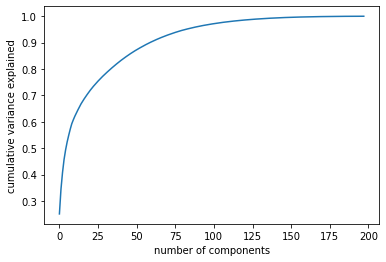

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

In [16]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_) # print and see how many components are selected

131


In [17]:
pd.DataFrame(pca.components_, columns = Df.columns)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.007071,0.084913,0.073477,0.067329,0.044732,0.001264,0.059436,0.108248,0.065203,0.111205,...,0.122283,0.068484,0.011106,0.059403,0.046665,0.060994,0.072039,0.042128,0.044582,0.019448
1,0.013336,0.048941,0.045876,0.052140,0.111047,0.000363,0.024692,0.101368,-0.091375,0.057585,...,-0.013272,0.033379,-0.047130,0.005917,-0.090341,-0.052142,-0.066335,-0.005019,0.137215,0.057474
2,0.122228,-0.048003,0.119929,-0.067411,-0.025748,-0.007692,-0.005577,-0.028747,-0.004558,-0.069055,...,-0.008481,0.153708,-0.000904,0.102381,0.021187,0.009818,0.009444,0.025854,0.010558,0.056705
3,-0.024943,-0.042683,-0.074146,0.020476,0.072150,0.017379,-0.021673,-0.048832,-0.094120,0.050708,...,-0.075769,-0.090928,0.113959,-0.099216,0.211234,-0.043303,-0.074003,-0.103764,0.116281,0.116278
4,0.204342,-0.117374,0.029082,0.028334,-0.045746,-0.009074,-0.062601,0.111381,-0.151452,0.061798,...,0.102773,-0.024198,0.052619,-0.016331,0.054292,-0.059748,0.026670,-0.089695,0.095699,0.009950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-0.162548,0.002159,-0.037712,0.022244,0.154150,0.037554,0.016486,-0.020788,-0.060970,0.002776,...,0.009941,0.026545,0.058254,-0.007911,0.037493,0.009557,-0.013551,0.024644,0.061868,0.005111
127,-0.071984,0.046512,-0.033158,0.008036,0.054138,0.021219,0.036509,0.026021,0.120956,0.010504,...,0.005545,-0.035040,0.042199,-0.078881,-0.114403,-0.013157,-0.050696,-0.128081,-0.038878,0.079130
128,-0.075162,-0.112568,0.012612,-0.068450,-0.051348,-0.000471,0.011933,0.089607,-0.002469,-0.055179,...,-0.062291,-0.007076,-0.042638,-0.011414,0.103039,0.073218,0.137441,0.006142,-0.031299,-0.097693
129,-0.232732,0.229051,0.101401,0.075926,-0.107728,-0.010460,0.018272,-0.009495,-0.033647,-0.098410,...,0.060898,-0.210436,-0.051364,0.030881,0.031815,-0.045215,0.021608,0.123384,0.050697,0.007436


In [18]:
n_pcs= pca.n_components_ # get number of component
n_pcs=50

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = Df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [19]:
n_pcs

50

In [20]:
most_important_names

['Portugal',
 'Mozambique',
 'Cambodia',
 'Vietnam',
 'Syria',
 'Philippines',
 'Hungary',
 'Papua New Guinea',
 'Laos',
 'Nepal',
 'United Arab Emirates',
 'Nigeria',
 'Eswatini',
 'Saint Vincent and the Grenadines',
 'Sweden',
 'Mauritius',
 'Burundi',
 'Uganda',
 'Uganda',
 'Monaco',
 'Saint Vincent and the Grenadines',
 'Marshall Islands',
 'Benin',
 'Marshall Islands',
 'El Salvador',
 'Samoa',
 'Botswana',
 'Central African Republic',
 'Central African Republic',
 'Tanzania',
 'Antarctica',
 'Holy See',
 'Micronesia',
 'Micronesia',
 'Central African Republic',
 'MS Zaandam',
 'Antarctica',
 'Micronesia',
 'Holy See',
 'Cameroon',
 'Kyrgyzstan',
 'Equatorial Guinea',
 'Marshall Islands',
 'Nicaragua',
 'Marshall Islands',
 'Equatorial Guinea',
 'Ghana',
 'Congo (Brazzaville)',
 'Tonga',
 'Congo (Brazzaville)']

# Regression

In [21]:
#define URL where data is located
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

#read in data
data_full = pd.read_csv(url)

#view first six rows of data
data_full[0:6]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,174073,174214,174214,174331,174582,175000,175353,175525,175893,175974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,271825,271825,272030,272030,272210,272250,272337,272412,272479,272552
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265079,265130,265186,265227,265265,265297,265323,265346,265366,265391
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38249,38342,38434,38434,38434,38620,38710,38794,38794,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98746,98746,98796,98796,98806,98806,98829,98855,98855,98855
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11


In [22]:
Df.shape

(779, 198)

Text(0.5, 1.0, 'US')

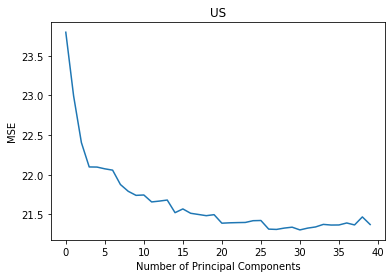

In [23]:
# define predictor and response variables
X = Df
y = Df[['US']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [24]:
score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:27], y, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1801311580.313464


In [25]:
regr = LinearRegression()
regr.fit(X_reduced[:,:27], y)

#calculate RMSE
pred = regr.predict(X_reduced[:,:27])

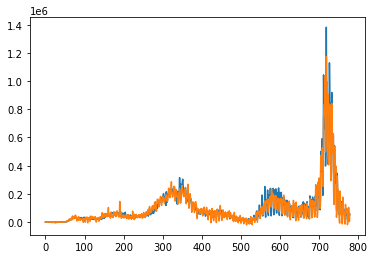

In [26]:
plt.plot(y)
plt.plot(pred)
plt.show()

In [27]:
print(len(y))

print(X_reduced.shape)

779
(779, 198)


In [28]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([25.06, 34.38, 40.71, 45.68, 49.34, 52.32, 54.85, 57.18, 59.25,
       60.75, 62.13, 63.37, 64.54, 65.7 , 66.8 , 67.77, 68.68, 69.56,
       70.39, 71.2 , 71.99, 72.75, 73.45, 74.13, 74.79, 75.43, 76.05,
       76.66, 77.24, 77.81, 78.36, 78.9 , 79.43, 79.95, 80.46, 80.97,
       81.46, 81.94, 82.42, 82.89, 83.34, 83.78, 84.21, 84.63, 85.04,
       85.45, 85.84, 86.23, 86.6 , 86.96, 87.31, 87.65, 87.98, 88.31,
       88.63, 88.95, 89.26, 89.56, 89.85, 90.14, 90.42, 90.69, 90.96,
       91.22, 91.48, 91.73, 91.97, 92.2 , 92.43, 92.65, 92.87, 93.08,
       93.29, 93.49, 93.69, 93.88, 94.07, 94.25, 94.43, 94.6 , 94.76,
       94.91, 95.06, 95.21, 95.35, 95.49, 95.63, 95.77, 95.9 , 96.03,
       96.15, 96.27, 96.39, 96.5 , 96.61, 96.72, 96.82, 96.92, 97.02,
       97.11, 97.2 , 97.29, 97.38, 97.47, 97.55, 97.63, 97.71, 97.78,
       97.85, 97.92, 97.99, 98.06, 98.13, 98.19, 98.25, 98.31, 98.37,
       98.43, 98.48, 98.53, 98.58, 98.63, 98.68, 98.73, 98.78, 98.82,
       98.86, 98.9 ,

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

# PCA  Prediction 

In [29]:
lag=7
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

779
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
print(y[-(lag+1):])
print(y_shift[-(lag+1):])

        US
771  51565
772  15292
773  12028
774  63110
775  29619
776  37595
777  48318
778  52110
          US
771  52110.0
772      NaN
773      NaN
774      NaN
775      NaN
776      NaN
777      NaN
778      NaN


In [31]:
print(X_shift.shape)
print(y_shift.shape)

(779, 198)
(779, 1)


In [32]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [33]:
print(X_shift.shape)
print(Xall.shape)
print(yall.shape)
print(X_reduced.shape)

(779, 198)
(779, 198)
(779, 1)
(779, 198)


In [34]:
print(yall[-10:])
print(y)
print(y_shift[-10:])

          US
769  37595.0
770  48318.0
771  52110.0
772      NaN
773      NaN
774      NaN
775      NaN
776      NaN
777      NaN
778      NaN
        US
0        1
1        1
2        0
3        3
4        0
..     ...
774  63110
775  29619
776  37595
777  48318
778  52110

[779 rows x 1 columns]
          US
769  37595.0
770  48318.0
771  52110.0
772      NaN
773      NaN
774      NaN
775      NaN
776      NaN
777      NaN
778      NaN


In [35]:
print(type(Xall))
print(type(X_reduced))
print(type(yall))
X_trainreduced=X_reduced[0:-lag,:]
#y_train=y.iloc[0:-lag,:].to_numpy()
y_train=yall.iloc[0:-lag,:].to_numpy()
print(type(X_trainreduced))
print(X_trainreduced.shape)
print(type(y_train))
print(y_train.shape)
X_testreduced=X_reduced[-(lag+1):,:]
#y_test=y.iloc[-(lag+1):,:].to_numpy()
y_test=yall.iloc[-(lag+1):,:].to_numpy()
print(type(X_testreduced))
print(X_testreduced.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(772, 198)
<class 'numpy.ndarray'>
(772, 1)
<class 'numpy.ndarray'>
(8, 198)
(8, 1)


In [36]:
y_test

array([[52110.],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan]])

Text(0.5, 1.0, 'US')

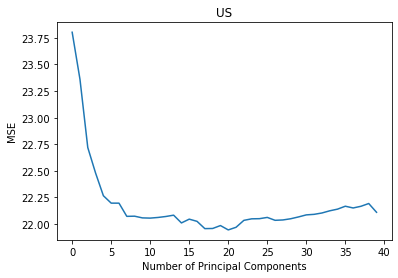

In [37]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [38]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:26], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

3714413042.8916373


In [39]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:20], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:20])

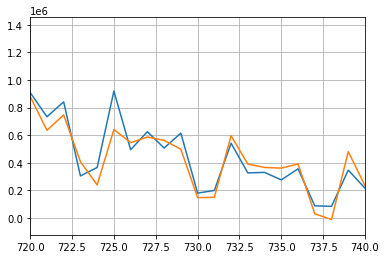

In [40]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(720, 740)
plt.grid()
plt.show()

In [41]:
predres = regr.predict(X_testreduced[:,:20])
print(predres)
print(y_test)

[[ 77784.31248983]
 [-27720.95185883]
 [-17548.38070436]
 [ 99666.77891117]
 [ 89446.49348868]
 [ 92247.00401032]
 [ 68012.14542169]
 [138305.56426572]]
[[52110.]
 [   nan]
 [   nan]
 [   nan]
 [   nan]
 [   nan]
 [   nan]
 [   nan]]


In [42]:
asx=np.linspace(len(yall)-lag-1,len(yall)-1,lag+1)

In [43]:
print(len(asx))
print(trainpred.shape)
print(predres.shape)

8
(772, 1)
(8, 1)


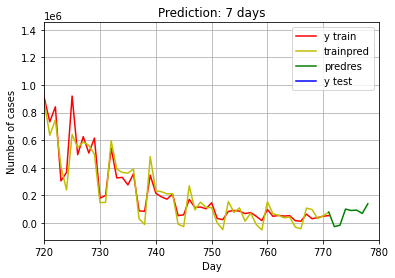

In [44]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 7 days")
plt.xlabel("Day")
plt.ylabel("Number of cases")
plt.xlim(720, 780)
#plt.ylim(-100000,200000)
plt.grid() 
plt.show()

In [45]:
import datetime
start_date = datetime.date(2022, 3, 11)
number_of_days = lag+1

date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day)).isoformat()
  date_list.append(a_date)

print(date_list)
print(len(date_list))

['2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18']
8


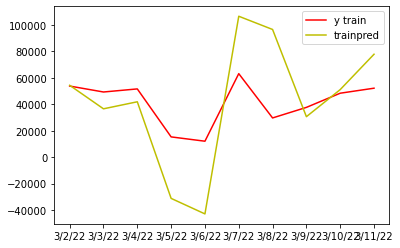

In [53]:
pic1=10
plt.plot(dates_JH[-pic1:],y_train[-pic1:], "-r", label='y train')
plt.plot(dates_JH[-pic1:],trainpred[-pic1:], "-y", label='trainpred')
plt.legend(('y train','trainpred'))

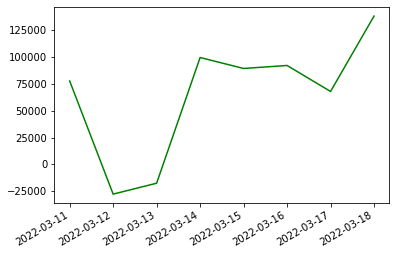

In [46]:
#pic1=5
#plt.plot(dates_JH[-pic1:],y_train[-pic1:], "-r", label='y train')
#plt.plot(dates_JH[-pic1:],trainpred[-pic1:], "-y", label='trainpred')
pic2=7
plt.plot(date_list,predres, "-g", label='predres')
plt.gcf().autofmt_xdate()
plt.show()

In [47]:
lag=30
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

779
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [383]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [384]:
X_trainreduced=X_reduced[0:-lag,:]
#y_train=y.iloc[0:-lag,:].to_numpy()
y_train=yall.iloc[0:-lag,:].to_numpy()
X_testreduced=X_reduced[-(lag+1):,:]
#y_test=y.iloc[-(lag+1):,:].to_numpy()
y_test=yall.iloc[-(lag+1):,:].to_numpy()

In [385]:
y_test

array([[52110.],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan],
       [   nan]])

Text(0.5, 1.0, 'US')

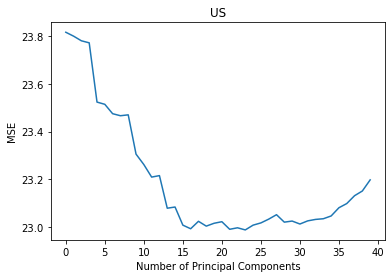

In [386]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [387]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:20], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

9953751702.618906


In [388]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:20], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:20])

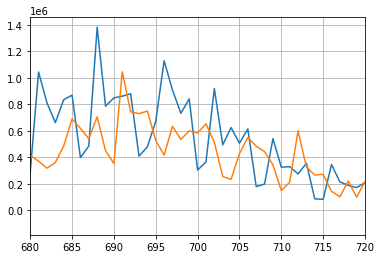

In [389]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(680, 720)
plt.grid()
plt.show()

In [390]:
predres = regr.predict(X_testreduced[:,:20])

In [391]:
asx=np.linspace(len(yall)-lag-1,len(yall)-1,lag+1)

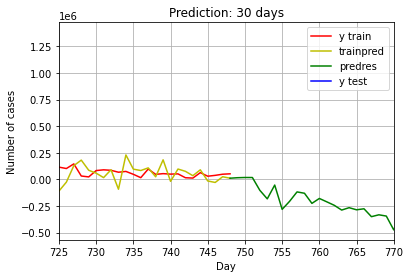

In [392]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 30 days")
plt.xlabel("Day")
plt.ylabel("Number of cases")
plt.xlim(725, 770)
plt.grid() 
plt.show()

In [393]:
print(len(dates_JH[-trainpred.shape[0]:]))
print(X_reduced.shape)
print(X_trainreduced.shape)
print(trainpred.shape[0])

749
(779, 198)
(749, 198)
749


In [394]:
import datetime
start_date = datetime.date(2022, 3, 11)
number_of_days = lag+1

date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day)).isoformat()
  date_list.append(a_date)

print(date_list)
print(len(date_list))

['2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10']
31


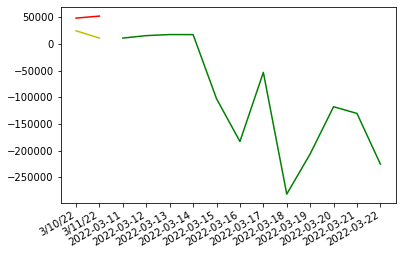

In [398]:
pic1=2
plt.plot(dates_JH[-pic1:],y_train[-pic1:], "-r", label='y train')
plt.plot(dates_JH[-pic1:],trainpred[-pic1:], "-y", label='trainpred')
pic2=12
plt.plot(date_list[0:pic2],predres[0:pic2], "-g", label='predres')
plt.gcf().autofmt_xdate()
plt.show()


In [208]:
print(yall.shape)
print(predres.shape)
print(len(asx))

(779, 1)
(31, 1)
31


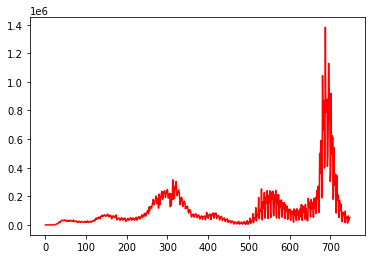

In [209]:
plt.plot(y_train, "-r", label='y train')

In [86]:
import datetime
start_date = datetime.date(2022, 3, 12)
number_of_days = 31

date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day)).isoformat()
  date_list.append(a_date)

print(date_list)
print(len(date_list))

['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11']
31


780
(779, 1)
(779, 1)
(31, 1)


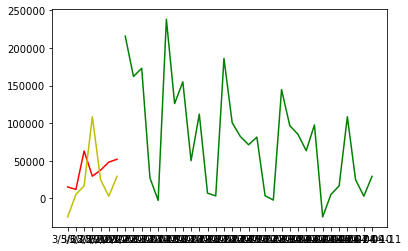

In [87]:
print(len(dates_JH))
print(y_train.shape)
print(trainpred.shape)
print(predres.shape)
plt.plot(dates_JH[-7:],y_train[-7:], "-r", label='y train')
plt.plot(dates_JH[-7:],trainpred[-7:], "-y", label='trainpred')
plt.plot(date_list,predres, "-g", label='predicted')



In [89]:
asx

array([748., 749., 750., 751., 752., 753., 754., 755., 756., 757., 758.,
       759., 760., 761., 762., 763., 764., 765., 766., 767., 768., 769.,
       770., 771., 772., 773., 774., 775., 776., 777., 778.])

# Appendix

In [ ]:
# load dataset into Pandas DataFrame
#df = pd.read_csv('datasaved.csv', names=['Unnamed:', '1/22/21', '1/23/21', '1/24/20','target'])
df = pd.read_csv('datasaved.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Standardize data
features = ['Unnamed:', '1/22/21', '1/23/21', '1/24/20']
# Separating out the features
x = df.loc[:, features].values

In [ ]:
# Separating out the target
y = df.loc[:,['target']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
type(x)

In [ ]:
print(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

In [ ]:
# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

In [ ]:
df[['target']].head()

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

In [ ]:
# Visualize 2D projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Explained variance
pca.explained_variance_ratio_